# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

Работу предстоит выполнить в 5 шагов:

**Шаг 1. Открыть файл с данными и изучить общую информацию**

**Шаг 2. Предобработка данных:** 
- определить и изучить пропущенные значения;
- заполнить пропуски; 
- указать причины; 
- привести данные к нужным типам.

**Шаг 3. Посчитать и добавить в таблицу:**
- цену квадратного метра;
- день недели, месяц и год публикации объявления;
- этаж квартиры; варианты — первый, последний, другой;
- соотношение жилой и общей площади, а также отношение площади кухни к общей.

**Шаг 4. Провести исследовательский анализ данных**

**Шаг 5. Написать общий вывод**

**Описание данных**
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах(м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

## Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 1 columns):
total_images	last_price	total_area	first_day_exposition	rooms	ceiling_height	floors_total	living_area	floor	is_apartment	studio	open_plan	kitchen_area	balcony	locality_name	airports_nearest	cityCenters_nearest	parks_around3000	parks_nearest	ponds_around3000	ponds_nearest	days_exposition    23699 non-null object
dtypes: object(1)
memory usage: 185.3+ KB


In [4]:
print(data.head(10))

  total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0  20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...                                                                                                                                                                                                                                                                  
1  7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...                                                                                                                                                                                                                                                                  
2  10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...               

### Вывод

Имеем датасет на 23699 строк. Названия столбцов склеились из-за разделителя "\t".  

## Предобработка данных

"Расклеим" названия столбцов:

In [5]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
table = data
table

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Что касается пропусков... Проще сказать, где пропусков нет... 

In [7]:
print('Число пропущенных значений о высоте потолков:', data['ceiling_height'].isnull().sum())
print('Число пропущенных значений об аппартаментах:', data['is_apartment'].isnull().sum())
print('Число пропущенных значений о наличии балкона:', data['balcony'].isnull().sum())
print('Число пропущенных значений о жилой площади:', data['living_area'].isnull().sum())  
print('Число пропущенных значений о ближайшем парке:', data['parks_nearest'].isnull().sum())
print('Число пропущенных значений о ближайшем водоёме:', data['ponds_nearest'].isnull().sum())
print('Число пропущенных значений о днях с момента размещения:', data['days_exposition'].isnull().sum())

Число пропущенных значений о высоте потолков: 9195
Число пропущенных значений об аппартаментах: 20924
Число пропущенных значений о наличии балкона: 11519
Число пропущенных значений о жилой площади: 1903
Число пропущенных значений о ближайшем парке: 15620
Число пропущенных значений о ближайшем водоёме: 14589
Число пропущенных значений о днях с момента размещения: 3181


-Выходит, в датасете куча пропусков? 
-Получается, что так. 

In [8]:
df = data
table = df.query('parks_nearest == "NaN"')
table

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23691,11,9470000.0,72.90,2016-10-13T00:00:00,2,2.75,25.0,40.30,7,NaN,...,10.60,1.0,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,NaN,5.0,17.50,4,NaN,...,6.00,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.00,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.70,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Видим, что везде, где пропущены значения в столбцах parks_around3000 и ponds_around3000 они пропущены и в parks_nearest и ponds_nearest. Также отсутствуют значения в parks_nearest и ponds_nearest, если в parks_around3000 и ponds_around3000 встречается "0.0". 
это подталкивает на единственный возможный вывод: нет значения -- нет парка / пруда поблизости :)

In [9]:
data['parks_around3000'] = data['parks_around3000'].fillna(0.0)
data['parks_nearest'] = data['parks_nearest'].fillna(0.0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0.0)
data['ponds_nearest'] = data['ponds_nearest'].fillna(0.0)

print('Число пропущенных значений о ближайшем парке:', data['parks_nearest'].isnull().sum())
print('Число пропущенных значений о ближайшем водоёме:', data['ponds_nearest'].isnull().sum())
print('Число пропущенных значений о расстоянии до парка:', data['parks_around3000'].isnull().sum())
print('Число пропущенных значений о расстоянии до водоёма:', data['ponds_around3000'].isnull().sum())

Число пропущенных значений о ближайшем парке: 0
Число пропущенных значений о ближайшем водоёме: 0
Число пропущенных значений о расстоянии до парка: 0
Число пропущенных значений о расстоянии до водоёма: 0


In [10]:
table = df.query('floors_total == "NaN"')
table

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.2,2018-10-02T00:00:00,2,NaN,NaN,30.80,4,NaN,...,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,0.0,49.0
237,4,2438033.0,28.1,2016-11-23T00:00:00,1,NaN,NaN,20.75,1,NaN,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,0.0,1.0,374.0,251.0
457,4,9788348.0,70.8,2015-08-01T00:00:00,2,NaN,NaN,38.40,12,NaN,...,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.6,2017-04-06T00:00:00,3,NaN,NaN,47.10,8,NaN,...,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,0.0,1.0,374.0,123.0
1757,5,3600000.0,39.0,2017-04-22T00:00:00,1,NaN,NaN,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000.0,63.5,2017-05-24T00:00:00,2,2.8,NaN,NaN,3,NaN,...,NaN,NaN,Санкт-Петербург,51340.0,15363.0,0.0,0.0,1.0,853.0,512.0
22656,4,4574160.0,64.5,2017-04-02T00:00:00,2,NaN,NaN,31.70,20,NaN,...,14.40,0.0,Санкт-Петербург,22041.0,17369.0,0.0,0.0,1.0,374.0,127.0
22808,0,14569263.0,110.4,2016-11-20T00:00:00,3,NaN,NaN,45.38,6,NaN,...,23.42,0.0,Санкт-Петербург,19095.0,4529.0,0.0,0.0,0.0,0.0,260.0
23590,0,21187872.0,123.3,2017-04-25T00:00:00,3,NaN,NaN,50.40,18,NaN,...,23.60,0.0,Санкт-Петербург,19095.0,4529.0,0.0,0.0,0.0,0.0,104.0


Большая часть строк, где пропущены значения 'floors_total', содержат пропуски и в других столбцах. Это откровенно мусорные записи, которые составляют очень незначительную долю от общего массива данных. От них можно с чистой совестью избавиться.
То же можно сказать про пропуски в столбце 'locality_name'. 

In [11]:
data.dropna(subset = ['floors_total'], inplace=True)
data.dropna(subset = ['locality_name'], inplace=True)

Посчитаем, что если хозяин объявления не указал данные о балконе, то балкона в квартире нет:

In [12]:
data['balcony'] = data['balcony'].fillna(0.0)

Также и апартаменты: не указано = не апартаменты:

In [13]:
data['is_apartment'] = data['is_apartment'].fillna('False')

Пропуски в столбцах расстояния до центра и аэропорта заполнить нечем. Поставим в них 0 и запомним, что это означает отсутствие данных по объявлению

In [14]:
data['airports_nearest'] = data['airports_nearest'].fillna(0.0)
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(-1)
print(data['cityCenters_nearest'].value_counts())

-1.0        5501
 8460.0       61
 20802.0      32
 10720.0      30
 8434.0       27
            ... 
 13589.0       1
 20388.0       1
 10404.0       1
 41626.0       1
 4706.0        1
Name: cityCenters_nearest, Length: 7624, dtype: int64


Посчитаем, что высота потолков зависит от этажности здания, а жилая площадь и площадь кухни - от общей. Заменим пропущенные значения на медианные:

In [15]:
data['ceiling_height'] = df['ceiling_height'].fillna(df.groupby('floors_total')['ceiling_height'].transform('median'))
data['living_area'] = df['living_area'].fillna(df.groupby('total_area')['living_area'].transform('median'))
data['kitchen_area'] = df['kitchen_area'].fillna(df.groupby('total_area')['kitchen_area'].transform('median'))

In [16]:
print('Сумма жилой площади и площади кухни:')
area_proof = data['kitchen_area'] + data['living_area']
print(area_proof.head(5))
print()
print('Общая площадь:')
print(data['total_area'].head(5))

Сумма жилой площади и площади кухни:
0     76.0
1     29.6
2     42.6
3    110.0
4     73.0
dtype: float64

Общая площадь:
0    108.0
1     40.4
2     56.0
3    159.0
4    100.0
Name: total_area, dtype: float64


In [17]:
data[(data['kitchen_area'] + data['living_area']) > data['total_area']][['total_area', 'kitchen_area', 'living_area']].head()

,total_area,kitchen_area,living_area
184,30.20,6.20,26.10
424,98.00,13.10,88.00
545,23.80,5.00,20.00
551,31.59,9.28,30.55
601,53.70,7.00,48.30


Оставшиеся пропущенные значения по столбцам также нечем заполнить на основании имеющихся данных. Заполним их нулями, чтобы оставить больше данных для дальнейшего анализа. В последствии при построении графиков будем просто отбрасывать аномальные значения

In [18]:
data['living_area'] = data['living_area'].fillna(0.0)
data['kitchen_area'] = data['kitchen_area'].fillna(0.0)
data['days_exposition'] = data['days_exposition'].fillna(0.0)

In [19]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

С пропусками покончено. Берёмся за типы данных:

In [20]:
data['is_apartment'] = data['is_apartment'].astype('bool')
data['floors_total'] = data['floors_total'].astype('int') #число этажей не может быть дробным
data['balcony'] = data['balcony'].astype('int') #как и число балконов

#Как и число прудов с парками:
data['parks_nearest'] = data['parks_nearest'].astype('int')
data['ponds_nearest'] = data['ponds_nearest'].astype('int')

#И расстояния в метрах нам достаточно, оуркглим до целых чисел: 

data['parks_around3000'] = data['parks_around3000'].astype('int')
data['ponds_around3000'] = data['ponds_around3000'].astype('int')
data['airports_nearest'] = data['airports_nearest'].astype('int')
data['cityCenters_nearest'] = data['cityCenters_nearest'].astype('int')

#и дни Газманов явно оставлял себе целыми: 
data['days_exposition'] = data['days_exposition'].astype('int')

#И цены туда же:
data['last_price'] = data['last_price'].astype('int')

А значения 'first_day_exposition' приведём к типу datetime, чтобы в дальнейшем иметь возможность проводить операции с датой:

In [21]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [22]:
df.reset_index()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23565 non-null int64
last_price              23565 non-null int64
total_area              23565 non-null float64
first_day_exposition    23565 non-null datetime64[ns]
rooms                   23565 non-null int64
ceiling_height          23565 non-null float64
floors_total            23565 non-null int64
living_area             23565 non-null float64
floor                   23565 non-null int64
is_apartment            23565 non-null bool
studio                  23565 non-null bool
open_plan               23565 non-null bool
kitchen_area            23565 non-null float64
balcony                 23565 non-null int64
locality_name           23565 non-null object
airports_nearest        23565 non-null int64
cityCenters_nearest     23565 non-null int64
parks_around3000        23565 non-null int64
parks_nearest           23565 non-null int64
ponds_around3000     

### Вывод по шагу 2

Избавился от пропусков ценой незначительного числа данных. Большую часть пропущенных значений высоты потолков, площади кухни и жилой площади в целом удалось заменить медианными значениями. Оставшиеся пропуски заменил нулями, чтобы не терять данные для последующего анализа, где аномальные значения можно будет просто отсеять. 

Изменил тип данных 'is_apartment' на bool, так как содержание столбца предполагает только False или True. Оставшиеся столбцы, где уместны целочисленные значения, заменил на int64. 

## Посчитайте и добавьте в таблицу

Посчитаем и добавим в таблицу цену квадратного метра:

In [23]:
price_m2 = data['last_price'] / data['total_area']
data['price_m2'] = price_m2
data['price_m2'] = data['price_m2'].astype('int')

Найдём и добавим день недели публикации объявления (0 - понедельник, 6 - воскресенье):

In [24]:
data['weekday_of_exposition'] = data['first_day_exposition'].dt.round('1d')
data['weekday_of_exposition'] = data['first_day_exposition'].dt.dayofweek

Найдём и добавим месяц и год публикации:

In [25]:
data['month_of_exposition'] = data['first_day_exposition'].dt.month
data['year_of_exposition'] = data['first_day_exposition'].dt.year

Добавим столбец с этажём квартиры (первый, последний, другой):

In [26]:
def floor_category(row): #пишу функцию определения этажа
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
 
data['floor_category'] = data.apply(floor_category, axis = 1)
print(data['floor_category'].value_counts()) #проверяю, как сработала функция

другой       17326
последний     3330
первый        2909
Name: floor_category, dtype: int64


Посчитаем и добавим к фрейму соотношение жилой и общей площади, а также отношение площади кухни к общей:

In [27]:
data['living_to_overall'] = data['living_area'] / data['total_area']
data['kitchen_to_overall'] = data['kitchen_area'] / data['total_area']

### Вывод по шагу 3 

Посчитал и добавил в таблицу цену квадратного для каждого объявления, день недели, месяц и год публикации, а также тип этажа (первый, последний, другой). Нашёл доли кухни и жилой площади относительно всей площади квартиры. Для них также выделил по столбцу во фрейме.

##  Проведите исследовательский анализ данных и выполните инструкции:

Построим гистограммы для параметров: площадь, цена, число комнат, высота потолков

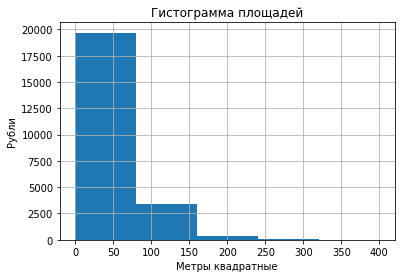

In [28]:
data['total_area'].hist(range=(0, 400), bins = 5)
plt.title('Гистограмма площадей')
plt.xlabel('Метры квадратные')
plt.ylabel('Рубли')
plt.show()

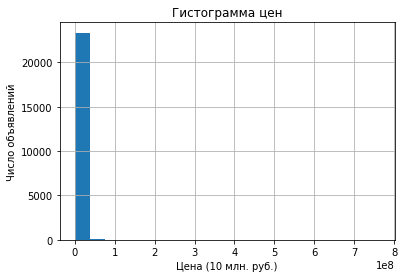

In [29]:
data['last_price'].hist(bins = 20, range=(0, 763000000))
plt.title('Гистограмма цен')
plt.xlabel('Цена (10 млн. руб.)')
plt.ylabel('Число объявлений')
plt.show()

Видим, что большая часть квартир имеет площать до 75 квадратных метров. График похож на распределение Пуассона.

Получили гистрограмму цен такого вида из-за сильного разброса. Самая дорогая квартира стоит аж 763 000 000 рублей. 
При этом основная масса значений состредоточена в промежутке до 60 000 000 рублей. Выведем гистограмму с этим ограничением:

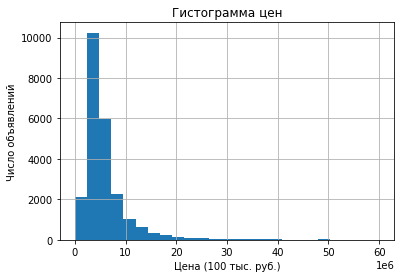

In [30]:
data['last_price'].hist(bins = 25, range=(0, 60000000))
plt.ticklabel_format(axis='x', scilimits=(6, 6))
plt.title('Гистограмма цен')
plt.xlabel('Цена (100 тыс. руб.)')
plt.ylabel('Число объявлений')
plt.show()

Уже точнее. А тут распределение нормальное. Видим пик в районе цен до 5 000 000 рублей. 

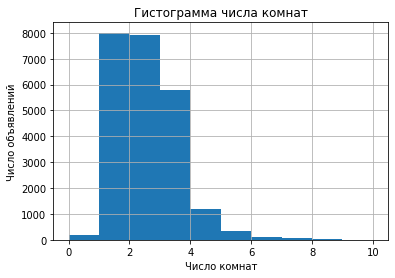

In [31]:
data['rooms'].hist(bins = 10, range=(0, 10))
plt.title('Гистограмма числа комнат')
plt.xlabel('Число комнат')
plt.ylabel('Число объявлений')
plt.show()

Снова распределение Пуассона. При этом есть аномальные значения в 0 комнат. Больная часть квартир в нашем фрейме -- однушки и двушки. Квартиры от 5 комнат встречаются очень редко.

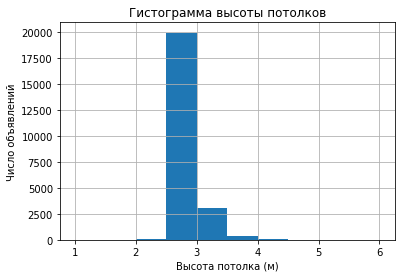

In [32]:
data['ceiling_height'].hist(bins = 10, range=(1, 6))
plt.title('Гистограмма высоты потолков')
plt.xlabel('Высота потолка (м)')
plt.ylabel('Число объявлений')
plt.show()

Подавляющее большинство квартир имеет высоту полотков от 2,5 до 3 метров. Выглядит правдоподобно. 

Изучим время продажи квартиры:

In [33]:
print('Среднее время продажи квартиры:' , data['days_exposition'].mean(), 'дней')
print('Медианное время продажи квартиры:' , data['days_exposition'].median(), 'дней')

Среднее время продажи квартиры: 156.42011457670273 дней
Медианное время продажи квартиры: 73.0 дней


Сильная разница средних и медианных значений говорит о возможном наличии выбросов. Построим гистрограмму времени продажи квартиры: 

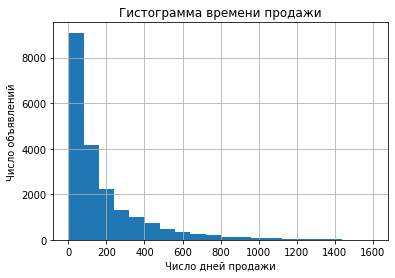

In [34]:
data['days_exposition'].hist(bins = 20, range = (1, 1600))
plt.title('Гистограмма времени продажи')
plt.xlabel('Число дней продажи')
plt.ylabel('Число объявлений')
plt.show()

Снова Пуассон. Подавляющее большинство квартир продаётся за менее, чем 100 дней. Дольше двух лет квартиры продаются крайне редко. Но выбросов не видно. Проверим более детально начало графика:

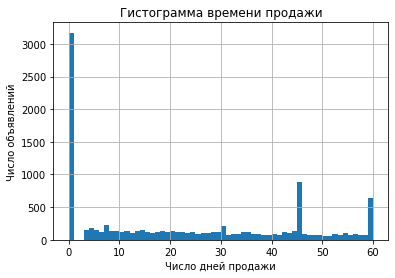

In [35]:
data['days_exposition'].hist(bins = 60, range=(0, 60))
plt.title('Гистограмма времени продажи')
plt.xlabel('Число дней продажи')
plt.ylabel('Число объявлений')
plt.show()

А вот и артефакты. Немногим более 3000 квартир продали за 0 дней. Получается, что если удалось продать квартиру за месяц или быстрее -- это большая удача, а срок более двух лет -- необычайно долгий.

Посчитаем, что все значения выше 750 дней -- слишком редкие, чтобы их учитывать. Заодно отбросим и нулевые артефактные значения: 

In [36]:
good_data = data.query('days_exposition < 750 & days_exposition > 0 & rooms != 0 & total_area != 0 & ceiling_height < 25 & last_price > 100000')

In [37]:
print(len(good_data))

19494


Какие факторы больше всего влияют на стоимость квартиры? Изучим, зависит ли цена от площади, числа комнат, удалённости от центра:

In [38]:
print('Коэффициент корреляции цены и площади:', good_data['last_price'].corr(good_data['total_area']))
print('Коэффициент корреляции цены и числа комнта:',good_data['last_price'].corr(good_data['rooms']))
print('Коэффициент корреляции цены и удалённости от центра:',good_data['last_price'].corr(good_data['cityCenters_nearest']))

Коэффициент корреляции цены и площади: 0.6352722114247272
Коэффициент корреляции цены и числа комнта: 0.35094191804625147
Коэффициент корреляции цены и удалённости от центра: -0.04670093348110181


Получили, что выраженная зависимость есть только между ценой и площадью. Число комнат не так сильно влияет на цену квартиры, а удалённость от центра - вообще не показатель.

Изучим влияние этажа на стоимость квартиры:

In [39]:
floor_coast = good_data['last_price'].groupby(data['floor_category']).mean()
print(floor_coast)

floor_category
другой       6.335449e+06
первый       4.464930e+06
последний    6.918549e+06
Name: last_price, dtype: float64


In [40]:
floor_coast_median = good_data['last_price'].groupby(data['floor_category']).median()
print(floor_coast_median)

floor_category
другой       4700000
первый       3800000
последний    4250000
Name: last_price, dtype: int64


Получается, что самые дорогие квартиры на последних этажах. Первый этаж наоборот, ценится меньше остальных.

Изучим зависимость цены от даты размещения: дня недели, месяца и года:

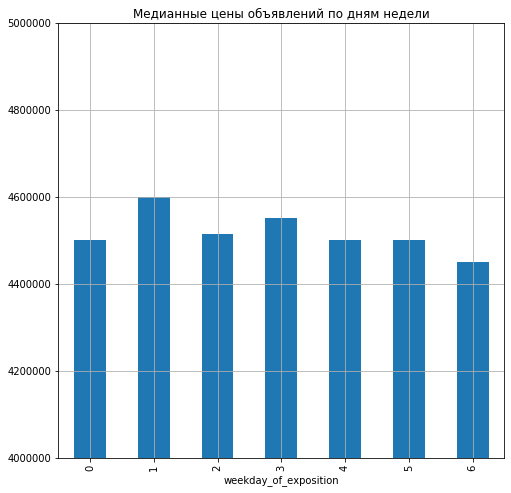

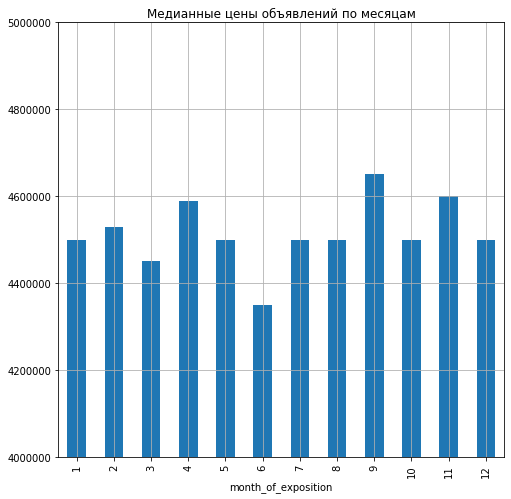

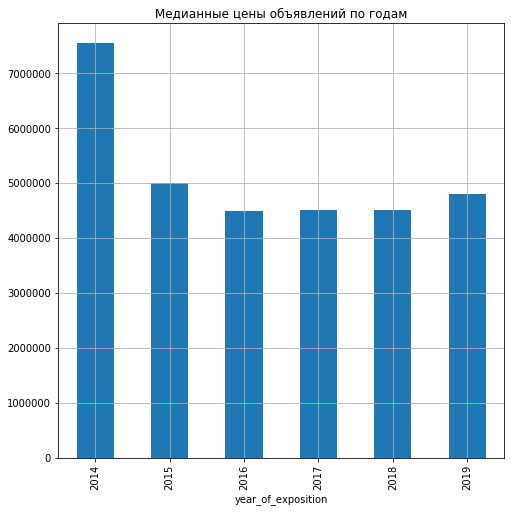

In [41]:
(good_data.groupby('weekday_of_exposition')['last_price'].agg('median').plot(kind='bar', ylim=(4000000, 5000000), figsize=(8,8), title='Медианные цены объявлений по дням недели', grid=True))
plt.show()
(good_data.groupby('month_of_exposition')['last_price'].agg('median').plot(kind='bar', ylim=(4000000, 5000000), figsize=(8,8), title='Медианные цены объявлений по месяцам', grid=True))
plt.show()
(good_data.groupby('year_of_exposition')['last_price'].agg('median').plot(kind='bar', figsize=(8,8), title='Медианные цены объявлений по годам', grid=True))
plt.show()

Из полученных диграмм можно сделать вывод, что дешевле всего из дней недели квартиры продавались по воскресеньям, из месяцов: в июне и марте, из годов - в 2016. 
Самым богатым был 2014 год. 

Выберем 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах. Выделим населённые пункты с самой высокой и низкой стоимостью жилья:

In [42]:
top_cities = data['locality_name'].value_counts().head(10)
table = top_cities
table

Санкт-Петербург      15651
посёлок Мурино         520
посёлок Шушары         439
Всеволожск             398
Пушкин                 369
Колпино                338
посёлок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: locality_name, dtype: int64

In [43]:
data['city_name'] = (
    data['locality_name']
    .where(data['locality_name'].isin(top_cities.index), 'Другой')
)

In [44]:
avg_m2_city = data['price_m2'].groupby(data['city_name']).mean()
table = avg_m2_city
table

city_name
Всеволожск            68654.007538
Выборг                58141.489451
Гатчина               68745.693811
Другой                60418.005342
Колпино               75424.150888
Пушкин               103125.373984
Санкт-Петербург      114868.433902
деревня Кудрово       92473.086957
посёлок Мурино        85672.803846
посёлок Парголово     90175.489297
посёлок Шушары        78550.883827
Name: price_m2, dtype: float64

Получили среднюю стоимость квадратного метра в 10 самых популярных городах датафрейма. 
Самая дорогая недвижимость в Санкт-Петербурге и городе Пушкин, самая дешевая - в Выборге, Всеволожске и Гатчине.
Что интересно - в остальных, менее популярных городах, в целом стоимость квадратного метра ещё ниже.

Выясним, какая область входит в центр Санкт-Петербурга:

In [45]:
spb = good_data.query('locality_name == "Санкт-Петербург"')

avg_m2_per_km = spb['price_m2'].groupby(spb['cityCenters_nearest']).mean()

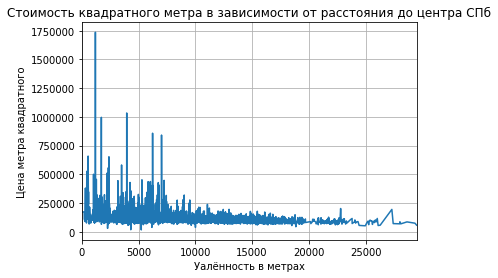

In [46]:
avg_m2_per_km.plot(grid=True, style='')
plt.title('Стоимость квадратного метра в зависимости от расстояния до центра СПб')
plt.xlabel('Уалённость в метрах')
plt.ylabel('Цена метра квадратного')
plt.show()

После 10000 метров на графике исчезают необычно высокие значения цены. Делаем вывод, что центральная зона Санкт-Петербурга равна 10км. 

Выделим сегмент квартир в центре. Проанализируем эту территорию и изучим следующие параметры: площадь, цена, число комнат, высота потолков.

In [47]:
center = spb.query('cityCenters_nearest < 10000')

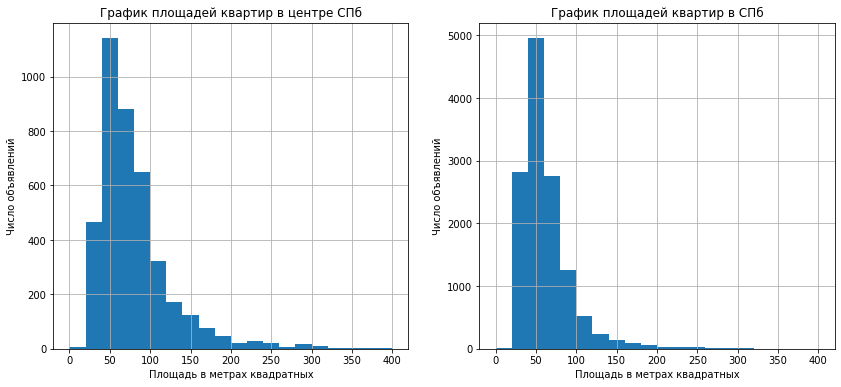

In [48]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14, 6))

ax1.hist(center['total_area'],range=(0, 400), bins = 20)
ax1.grid(True)
ax1.set_title('График площадей квартир в центре СПб')
ax1.set_xlabel('Площадь в метрах квадратных')
ax1.set_ylabel('Число объявлений')

ax2.hist(spb['total_area'],range=(0, 400), bins = 20)
ax2.grid(True)
ax2.set_title('График площадей квартир в СПб')
ax2.set_xlabel('Площадь в метрах квадратных')
ax2.set_ylabel('Число объявлений')

plt.show()

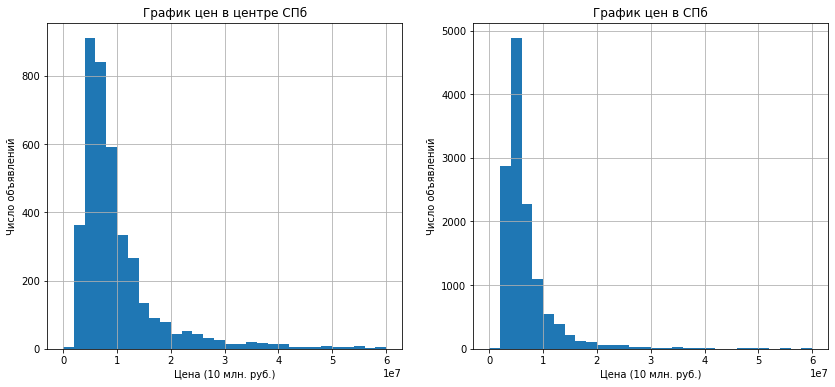

In [49]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14, 6))

ax1.hist(center['last_price'],bins = 30, range=(0, 60000000))
ax1.grid(True)
ax1.set_title('График цен в центре СПб')
ax1.set_xlabel('Цена (10 млн. руб.)')
ax1.set_ylabel('Число объявлений')

ax2.hist(spb['last_price'],bins = 30, range=(0, 60000000))
ax2.grid(True)
ax2.set_title('График цен в СПб')
ax2.set_xlabel('Цена (10 млн. руб.)')
ax2.set_ylabel('Число объявлений')

plt.show()

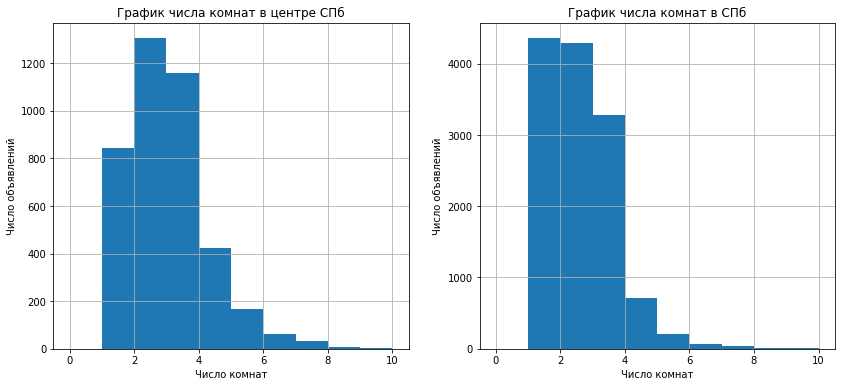

In [50]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14, 6))

ax1.hist(center['rooms'],bins = 10, range=(0, 10))
ax1.grid(True)
ax1.set_title('График числа комнат в центре СПб')
ax1.set_xlabel('Число комнат')
ax1.set_ylabel('Число объявлений')

ax2.hist(spb['rooms'],bins = 10, range=(0, 10))
ax2.grid(True)
ax2.set_title('График числа комнат в СПб')
ax2.set_xlabel('Число комнат')
ax2.set_ylabel('Число объявлений')

plt.show()

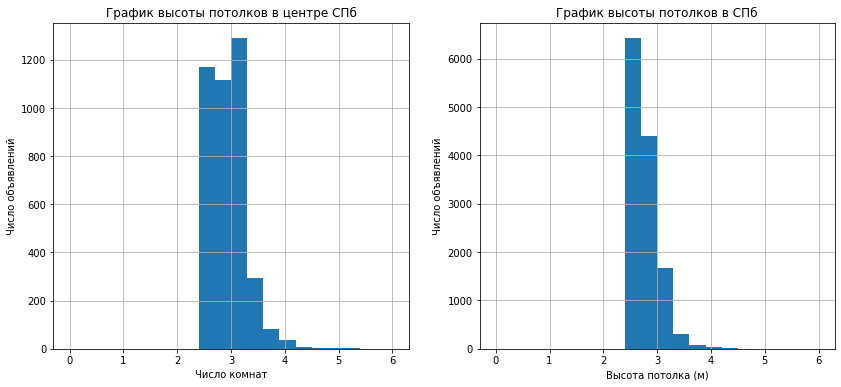

In [51]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14, 6))

ax1.hist(center['ceiling_height'],bins = 20, range=(0, 6))
ax1.grid(True)
ax1.set_title('График высоты потолков в центре СПб')
ax1.set_xlabel('Число комнат')
ax1.set_ylabel('Число объявлений')

ax2.hist(spb['ceiling_height'],bins = 20, range=(0, 6))
ax2.grid(True)
ax2.set_title('График высоты потолков в СПб')
ax2.set_xlabel('Высота потолка (м)')
ax2.set_ylabel('Число объявлений')

plt.show()

Сравнивая полученные гистрограммы с графиками, полученными ранее, можно сказать:

Распределение площадей у квартир в центре и по всему городу во многом совпадает: большая часть от 40 до 75 квадратных метров, однако среди квартир в центре также значительное число и тех, что имеют площадь от 75 до 100 квадратных метров.

С ценами картина сильно отличается. Характер распределения тот же, в целом по городу преобладали квартиры стоимостью от 4 до 5 миллионов рублей, в центре наиболее распространена эта же группа, однако почти также много квартир стоимостью от 5 до 6 миллионов.   

Однушки и двушки - самые распространённые варианты по городу в целом, но в центре картина немного иная, однушки уже не так широко представлены. Больше всего двушек, за ними с небольшим отставанием идут трёшки. 

В центре больше квартир с потолками от трёх метров, чем в целом по городу. Оно и ясно: окраина - стандартная планировка, многоэтажки с высотой полотков 2,5м. В то время как в центре - старый фонд - около 1250 квартир с потолками более 3 метров! 

Рассмотрим факторы, влияющие на стоимость квартиры в центре:

In [52]:
print('Коэффициент корреляции цены и площади:', center['last_price'].corr(center['total_area']))
print('Коэффициент корреляции цены и числа комнта:',center['last_price'].corr(center['rooms']))
print('Коэффициент корреляции цены и удалённости от центра:',center['last_price'].corr(center['cityCenters_nearest']))

Коэффициент корреляции цены и площади: 0.6409451222899702
Коэффициент корреляции цены и числа комнта: 0.36167175967264054
Коэффициент корреляции цены и удалённости от центра: -0.14017407556811934


In [53]:
print('А теперь данные по всему Питеру:')
print('Коэффициент корреляции цены и площади:', spb['last_price'].corr(spb['total_area']))
print('Коэффициент корреляции цены и числа комнта:',spb['last_price'].corr(spb['rooms']))
print('Коэффициент корреляции цены и удалённости от центра:',spb['last_price'].corr(spb['cityCenters_nearest']))

А теперь данные по всему Питеру:
Коэффициент корреляции цены и площади: 0.6424012699962176
Коэффициент корреляции цены и числа комнта: 0.3616089385444359
Коэффициент корреляции цены и удалённости от центра: -0.23780033644955267


Коэффициенты практически не изменились. Немного выросла отрицательная зависимость между ценой и удалённостью от центра, но значение коэффициента настолько мало, что неправда :)
Получается, что зависимость между ценой и площадью одинакова, вне зависимости от расположения квартиры.

А что там с этажами? 

In [54]:
floor_coast_center = center['last_price'].groupby(center['floor_category']).mean()
print(floor_coast_center)

floor_category
другой       1.198879e+07
первый       7.233040e+06
последний    1.509813e+07
Name: last_price, dtype: float64


In [55]:
floor_coast_spb = spb['last_price'].groupby(spb['floor_category']).mean()
print(floor_coast_spb)

floor_category
другой       7.497941e+06
первый       5.616474e+06
последний    9.480370e+06
Name: last_price, dtype: float64


Числа отличаются, но самые дорогие квартиры и там и там на последних этажах. Питер, мансарды, выходы на крыши... Вот в чем дело. А жители более отдалённых, не центральных районов, большее предпочтение отдают этажам "посерёдке". Не хотят прогматичные петербуржцы сталкиваться с протекающей крышей.

Ну и дата размещения, куда без неё: 

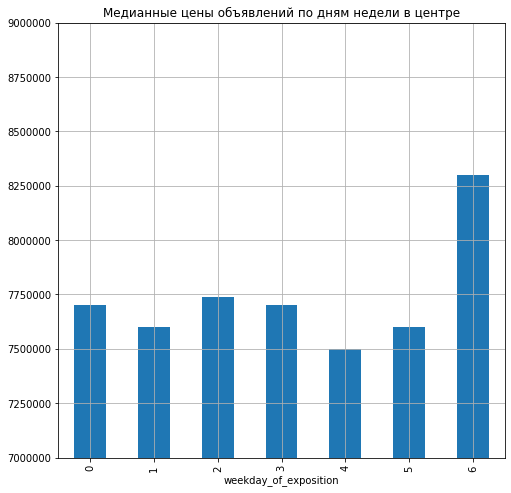

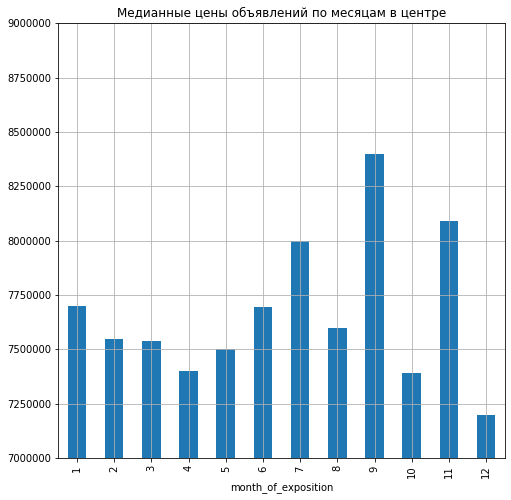

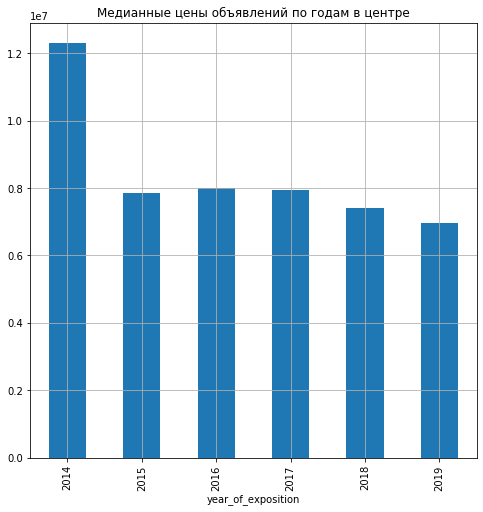

In [56]:
(center.groupby('weekday_of_exposition')['last_price'].agg('median').plot(kind='bar', ylim=(7000000, 9000000), figsize=(8,8), title='Медианные цены объявлений по дням недели в центре', grid=True))
plt.show()
(center.groupby('month_of_exposition')['last_price'].agg('median').plot(kind='bar', ylim=(7000000, 9000000), figsize=(8,8), title='Медианные цены объявлений по месяцам в центре', grid=True))
plt.show()
(center.groupby('year_of_exposition')['last_price'].agg('median').plot(kind='bar', figsize=(8,8), title='Медианные цены объявлений по годам в центре', grid=True))
plt.show()

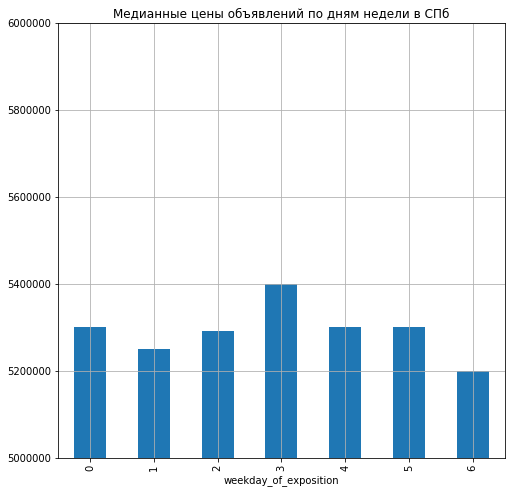

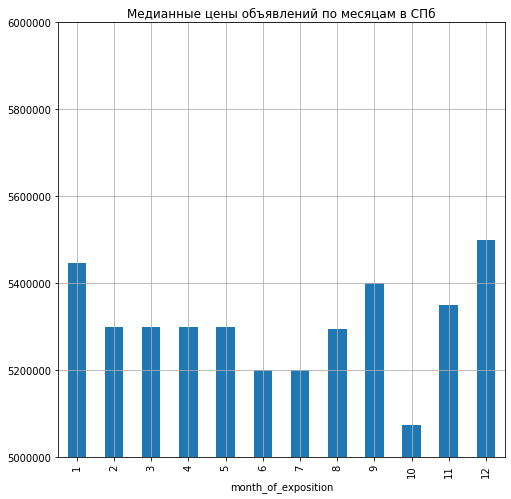

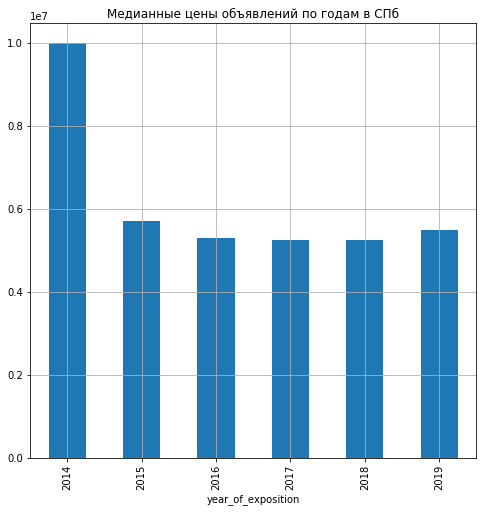

In [57]:
(spb.groupby('weekday_of_exposition')['last_price'].agg('median').plot(kind='bar', ylim=(5000000, 6000000), figsize=(8,8), title='Медианные цены объявлений по дням недели в СПб', grid=True))
plt.show()
(spb.groupby('month_of_exposition')['last_price'].agg('median').plot(kind='bar', ylim=(5000000, 6000000), figsize=(8,8), title='Медианные цены объявлений по месяцам в СПб', grid=True))
plt.show()
(spb.groupby('year_of_exposition')['last_price'].agg('median').plot(kind='bar', figsize=(8,8), title='Медианные цены объявлений по годам в СПб', grid=True))
plt.show()

Из заметных различий зависимости цен на квартиры в зависимости от дня недели подачи объявления: наиболее дорогие квартиры в центре публикуют по воскресеньям, что касается всего города - лидирует четверг. Из месяцов для центра самым провальным стал декабрь, для всего города - октябрь, а декабрь наоборот - один из лидеров. По годам картина примерно одинакова, самый богатый - 2014й. 

## Общий вывод

Данные Яндекс.Недвижимости пришлось немного причесать: удалил откровенные мусорные строки без этажности домов и указания города, заполнил оставшиеся пропуски, получив аккурантный фрейм на 23699 строк. Поменял типы данных на более удобные. 

Далее посчитал дополнительные параметры для анализа: цену квадратного метра, день, месяц и год объявлени. 
Проанализировал влияние площади, цены, числа комнат, удалённости от центра и высоты потолков на цену квартиры. 
Далее выявил группу квартир, местоположение которых можно назвать "центром" Санкт-Петербурга. Провёл по полученной выборке такое же исследование. 

Ожидаемо, квартиры в центре оказались дороже. И сильно. Если в целом самыми распространёнными были объекты от 4 до 5 миллионов рублей, то для центра этот параметр равен 5 - 6 миллионам. 
В центре больше средняя площадь квартиры, выше и потолки. 
Однушки больше распространены на окраине, чем в центре города, тут преобладают, на ровне в двушками, трёшки. 

День и месяц публикации объявления по-разному сказываются на квартирах в центре и в СПБ в целом. Более дорогие квартиры в центре выкладывают на Я.Недвижимость в воскресенье, а во всем городе - в четверг. 
Объединяет центр и весь город только год. 2014 самый дорогой, 2019 самый бедный для центра, а 2017 - для всего города. 